**Добавление столбца "близок к достопримечательности"**

In [2]:
import pandas as pd

In [7]:
data=pd.read_csv('merged (1).csv')

In [19]:
data_sigths=pd.read_excel('london attractions.xlsx')

In [9]:
data.head(2)

,Unnamed: 0,name,reviews,rating,price_range,is_sponsored,latitude,longitude,has_delivery,is_premium,cuisines,diets,dining_options,reviews_rating_1,reviews_rating_2,reviews_rating_3,reviews_rating_4,reviews_rating_5,IsIn_MICHELIN_Guide
0,0,Leicester Arms,602,4.5,$$ - $$$,True,51.510597,-0.137677,False,False,"British, Pub","Vegetarian friendly, Gluten free options","Reservations, Seating, Street Parking, Televis...",30.0,23.0,51.0,156.0,342.0,0.0
1,1,Swiss Butter,182,4.0,$$ - $$$,True,51.520620,-0.122808,False,True,"French, Steakhouse",The menu does not match the diets,"Seating, Wheelchair Accessible, Serves Alcohol...",21.0,15.0,14.0,22.0,110.0,0.0


In [20]:
data_sigths

,Attraction,latitude,longitude
0,Tower of London,51.508279,-0.075917
1,London Eye,51.503450,-0.119514
2,Buckingham Palace,51.501484,-0.141321
3,St. Paul's Cathedral,51.513992,-0.098329
4,Westminster Abbey,51.499702,-0.127537
5,The British Museum,51.519664,-0.127080
6,Tower Bridge,51.505707,-0.075437
7,The National Gallery,51.509193,-0.128251
8,Big Ben,51.500899,-0.124641
9,Hyde Park,51.507694,-0.164194


In [11]:
import numpy as np

In [12]:
data['latitude min']=data['latitude']-0.00899
data['latitude max']=data['latitude']+0.00899
data['longitude min']=data['longitude']-(0.00899/np.cos(data['latitude']))
data['longitude max']=data['longitude']+(0.00899/np.cos(data['latitude']))

In [13]:
data.head(2)

,Unnamed: 0,name,reviews,rating,price_range,is_sponsored,latitude,longitude,has_delivery,is_premium,...,reviews_rating_1,reviews_rating_2,reviews_rating_3,reviews_rating_4,reviews_rating_5,IsIn_MICHELIN_Guide,latitude min,latitude max,longitude min,longitude max
0,0,Leicester Arms,602,4.5,$$ - $$$,True,51.510597,-0.137677,False,False,...,30.0,23.0,51.0,156.0,342.0,0.0,51.501607,51.519587,-0.165775,-0.109579
1,1,Swiss Butter,182,4.0,$$ - $$$,True,51.520620,-0.122808,False,True,...,21.0,15.0,14.0,22.0,110.0,0.0,51.511630,51.529610,-0.151767,-0.093849


In [14]:
data['is close to sightseeng']=0

In [21]:
for i in range (0, data.shape[0]):
  for j in range (0, data_sigths.shape[0]):
    if (data_sigths.loc[j,'latitude']<data.loc[i,'latitude max'])&(data_sigths.loc[j,'latitude']>data.loc[i,'latitude min'])&(data_sigths.loc[j,'longitude']<data.loc[i,'longitude max'])&(data_sigths.loc[j,'longitude']>data.loc[i,'longitude min']):
        data.loc[i,'is close to sightseeng']=1
        #print(data.loc[i,'longitude'],data.loc[i,'latitude'],data.loc[i,'longitude max'],data.loc[i,'longitude min'],data.loc[i,'latitude max'],data.loc[i,'latitude min'])

data.head(2)

,Unnamed: 0,name,reviews,rating,price_range,is_sponsored,latitude,longitude,has_delivery,is_premium,...,reviews_rating_2,reviews_rating_3,reviews_rating_4,reviews_rating_5,IsIn_MICHELIN_Guide,latitude min,latitude max,longitude min,longitude max,is close to sightseeng
0,0,Leicester Arms,602,4.5,$$ - $$$,True,51.510597,-0.137677,False,False,...,23.0,51.0,156.0,342.0,0.0,51.501607,51.519587,-0.165775,-0.109579,1
1,1,Swiss Butter,182,4.0,$$ - $$$,True,51.520620,-0.122808,False,True,...,15.0,14.0,22.0,110.0,0.0,51.511630,51.529610,-0.151767,-0.093849,1


In [23]:
data[data['is close to sightseeng']==1].shape

(4360, 24)

In [24]:
data[data['is close to sightseeng']==0].shape

(4586, 24)

4360 ресторанов находятся на расстоянии 1 км от достопримечательности.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8946 entries, 0 to 8945
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              8946 non-null   int64  
 1   name                    8946 non-null   object 
 2   reviews                 8946 non-null   int64  
 3   rating                  8946 non-null   float64
 4   price_range             8946 non-null   object 
 5   is_sponsored            8946 non-null   bool   
 6   latitude                8946 non-null   float64
 7   longitude               8946 non-null   float64
 8   has_delivery            8946 non-null   bool   
 9   is_premium              8946 non-null   bool   
 10  cuisines                8946 non-null   object 
 11  diets                   8946 non-null   object 
 12  dining_options          8946 non-null   object 
 13  reviews_rating_1        8946 non-null   float64
 14  reviews_rating_2        8946 non-null   

In [26]:
data.to_csv('data_plus_sights.csv', encoding='utf-8')

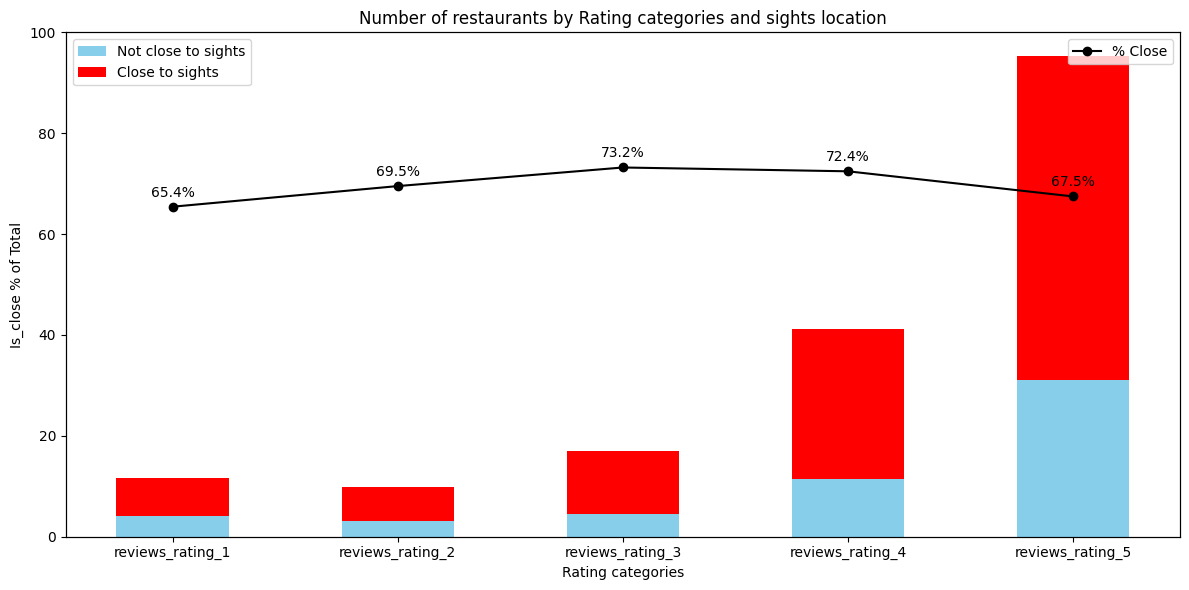

In [61]:
columns = data.columns[13:18] # Выбор столбцов
counts = data[columns].sum() # Подсчёт количества ресторанов

# Подсчёт количества ресторанов с упоминанием в Michelin
close_counts = data[data['is close to sightseeng'] == 1][columns].sum()
non_close_counts = data[data['is close to sightseeng'] == 0][columns].sum()

percentage = (close_counts / counts * 100).fillna(0) # Расчёт процентного соотношения
categories = columns.tolist()# Метки для оси X

fig, ax1 = plt.subplots(figsize=(12, 6))
bar_width = 0.5

# Столбчатая диаграмма (Michelin / не Michelin)
ax1.bar(categories, non_close_counts, color='skyblue', label='Not close to sights', width=bar_width)
ax1.bar(categories, close_counts, bottom=non_close_counts, color='red', label='Close to sights', width=bar_width)

ax1.set_xlabel('Rating categories')
ax1.set_ylabel('Number of restaurants')
ax1.set_title('Number of restaurants by Rating categories and sights location')

ax1.legend(loc='upper left')
ax1.get_yaxis().set_visible(False)

# Вторая ось Y для процентного соотношения
ax2 = ax1.twinx()
ax2.plot(categories, percentage, color='black', marker='o', linestyle='-', label='% Close')
ax2.set_ylabel('Is_close % of Total')
ax2.set_ylim(0, 100)  # Проценты от 0 до 100
ax2.legend(loc='upper right')
ax2.yaxis.set_ticks_position('left')  # Переносим метки на правую сторону
ax2.yaxis.set_label_position('left')
# Подписи на точках перелома
for i, txt in enumerate(percentage):
    ax2.text(i, txt + 2, f'{txt:.1f}%', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()
